In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data/ex2data1.txt', sep=',', header=None)

In [5]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [155]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

In [156]:
pos = y == 1
neg = y == 0

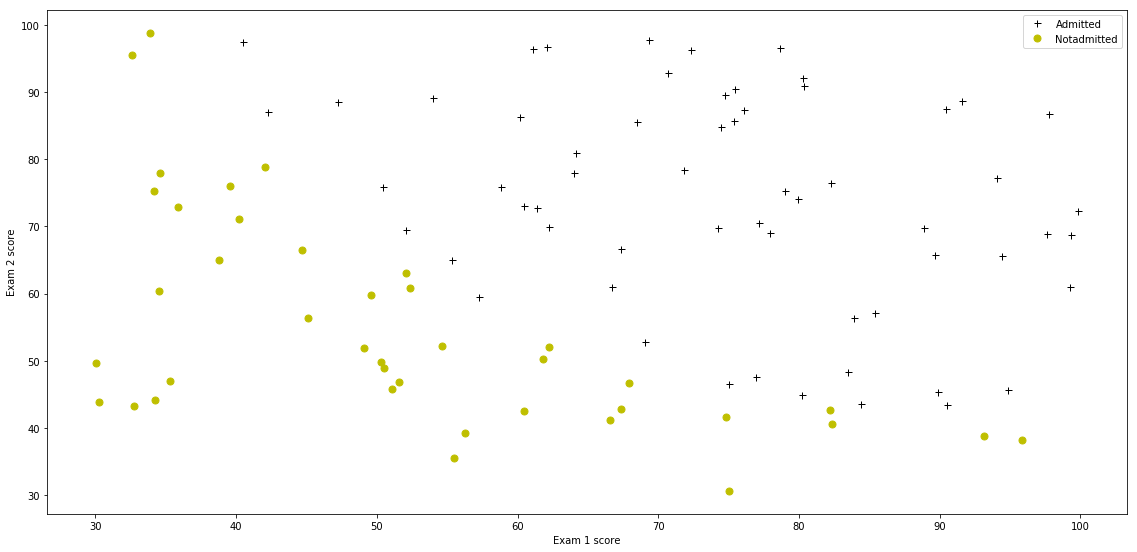

In [157]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0, 1, 1, 1])
ax.plot(X[pos][:, 0], X[pos][:, 1], 'k+', ms=7)
ax.plot(X[neg][:, 0], X[neg][:, 1], 'yo', ms=7)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(('Admitted', 'Notadmitted'), numpoints=1, loc=1, frameon = True, fancybox = True)

In [9]:
sigmoid = lambda z: (1 / (1 + np.exp(-z)))

In [10]:
m, n = X.shape

In [13]:
X = np.hstack((np.ones((m, 1)), X))

In [81]:
initial_theta = np.zeros(n+1)

In [84]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -(1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
#     if np.isnan(J[0]):
#         return np.inf
    return J

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * (h - y).T.dot(X)
    
    return grad

In [85]:
cost_function(initial_theta, X, y)

0.6931471805599452

In [86]:
gradient(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [87]:
from scipy.optimize import minimize

In [88]:
res = minimize(cost_function, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

/Users/lality/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476820e-09, -9.31921318e-07, -2.82608928e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [89]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return p.astype('int')

In [91]:
p = predict(res.x, X) 

In [93]:
print('Training score = {0}%'.format( 100 * sum(p == y.ravel())/p.size ))

Training score = 89.0%


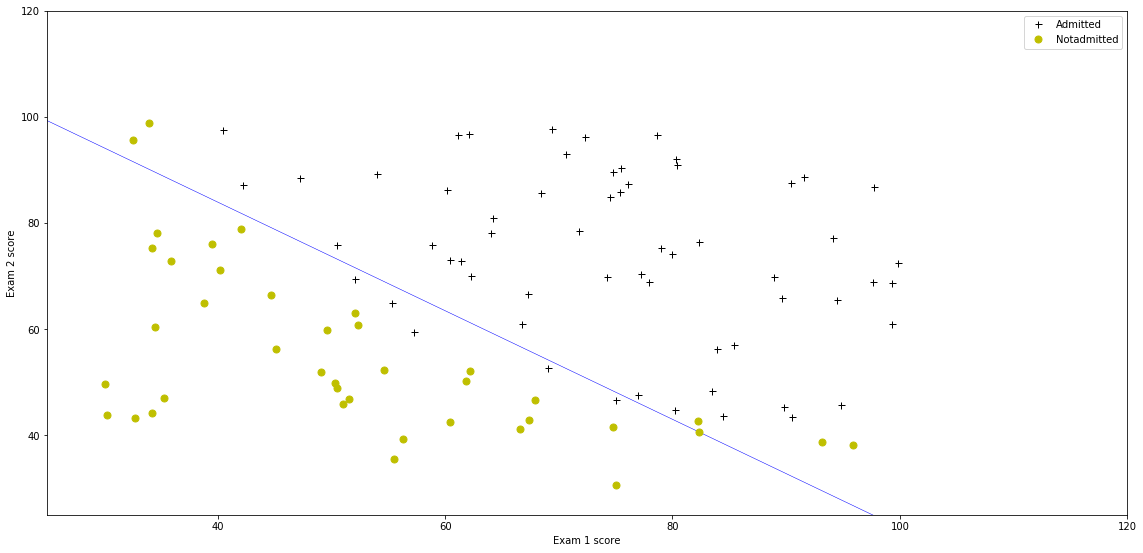

In [114]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0, 1, 1, 1])
ax.plot(X[pos][:, 1], X[pos][:, 2], 'k+', ms=7)
ax.plot(X[neg][:, 1], X[neg][:, 2], 'yo', ms=7)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(('Admitted', 'Notadmitted'), numpoints=1, loc=1, frameon = True, fancybox = True)
ax.set_xlim((25, 120))
ax.set_ylim((25, 120))

xx1, xx2 = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))
X_grid = np.c_[ np.ones((np.ravel(xx1).shape[0], 1)), np.ravel(xx1), np.ravel(xx2)]
h = sigmoid(X_grid.dot(res.x))
h = h.reshape(xx1.shape)

ax.contour(xx1, xx2, h, [0.5], linewidths=0.5, colors='b')

In [115]:
## Regularized Logistic

In [117]:
data2 = pd.read_csv('data/ex2data2.txt', sep=',', header=None)

In [131]:
X2 = data2.iloc[:, 0:2].values
y2 = data2.iloc[:, 2].values

In [132]:
X2 = np.c_[np.ones(X2.shape[0]), X2]

In [135]:
m, n = X2.shape

In [142]:
theta2 = np.zeros((n, 1))

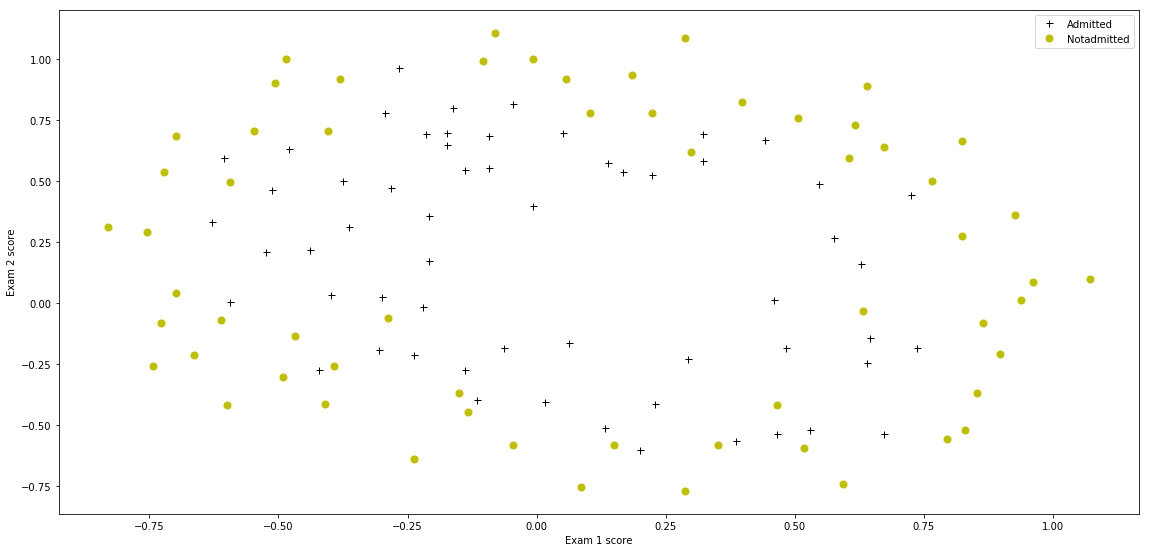

In [175]:
y2 = np.c_[y2]
pos = y2[:,0] == 1
neg = y2[:,0] == 0
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0, 1, 1, 1])
ax.plot(X2[pos][:, 1], X2[pos][:, 2], 'k+', ms=7)
ax.plot(X2[neg][:, 1], X2[neg][:, 2], 'yo', ms=7)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(('Admitted', 'Notadmitted'), numpoints=1, loc=1, frameon = True, fancybox = True)
# ax.set_xlim((25, 120))
# ax.set_ylim((25, 120))

In [176]:
def poly_features(X, deg):
    x1 = X[:, 1]
    x2 = X[:, 2]
    X_poly = X
    for i in range(2, deg + 1):
        for j in range(0, i+1):
            X_poly = np.c_[X_poly, x1**(i - j) * x2**j]
    return X_poly

In [177]:
X_poly = poly_features(X2, 6)

In [178]:
X_poly

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [164]:
X2[np.c_[y2][:,0] == 0][:, 1], X2[np.c_[y2][:,0] == 0][:, 2]

(array([ 0.18376  ,  0.22408  ,  0.29896  ,  0.50634  ,  0.61578  ,
         0.60426  ,  0.76555  ,  0.92684  ,  0.82316  ,  0.96141  ,
         0.93836  ,  0.86348  ,  0.89804  ,  0.85196  ,  0.82892  ,
         0.79435  ,  0.59274  ,  0.51786  ,  0.46601  ,  0.35081  ,
         0.28744  ,  0.085829 ,  0.14919  , -0.13306  , -0.40956  ,
        -0.39228  , -0.74366  , -0.69758  , -0.75518  , -0.69758  ,
        -0.4038   , -0.38076  , -0.50749  , -0.54781  ,  0.10311  ,
         0.057028 , -0.10426  , -0.081221 ,  0.28744  ,  0.39689  ,
         0.63882  ,  0.82316  ,  0.67339  ,  1.0709   , -0.046659 ,
        -0.23675  , -0.15035  , -0.49021  , -0.46717  , -0.28859  ,
        -0.61118  , -0.66302  , -0.59965  , -0.72638  , -0.83007  ,
        -0.72062  , -0.59389  , -0.48445  , -0.0063364,  0.63265  ]),
 array([ 0.93348 ,  0.77997 ,  0.61915 ,  0.75804 ,  0.7288  ,  0.59722 ,
         0.50219 ,  0.3633  ,  0.27558 ,  0.085526,  0.012427, -0.082602,
        -0.20687 , -0.36769 , -0.5

In [ ]:
def cost_function(theta, X, y, lmda):
    m = len(y)
    h = sigmoid(X.dot(theta))
    reg = (lmda / (2 * m)) * theta[1:].T.dot(theta[1:])# np.sum(np.square(theta[1:]))  
    J = -(1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + reg
#     if np.isnan(J[0]):
#         return np.inf
    return J

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * (h - y).T.dot(X)
    
    return grad